In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np


In [2]:
folder_path = os.getcwd()
print(folder_path)
names = []
acc = []
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        with open(os.path.join(folder_path, filename), 'r') as file:
            line = file.readline()
            number = float(line.split(': ')[1])
            
            names.append(filename)
            acc.append(number)

/home/mars/Bachlor_project/BachlorProjekt/scripts/results/SVC/NonMir/unbalanced10


In [3]:
def find_substring(sting):
    start_index = sting.find("hog_features")
    end_index = sting.find("_norm")

    if start_index != -1 and end_index != -1:
        substring = sting[start_index:end_index]
        return(substring)
    else:
        print("Substring not found")

In [4]:
for x in names:
    print(x)

SVMC_Kernel_rbf_Nbins_10_ClassWeights_None_dateFalse_hog_features_(169, 534, 3)_cells_(4, 4)_block_(2, 2)_norm_L2_mir_False.txt
SVMC_Kernel_rbf_Nbins_10_ClassWeights_None_dateFalse_hog_features_(144, 496, 3)_cells_(16, 16)_block_(2, 2)_norm_L2_mir_False.txt
SVMC_Kernel_rbf_Nbins_10_ClassWeights_None_dateFalse_hog_features_(144, 496, 3)_cells_(8, 8)_block_(2, 2)_norm_L2_mir_False.txt
SVMC_Kernel_rbf_Nbins_10_ClassWeights_None_dateFalse_hog_features_(169, 534, 3)_cells_(8, 8)_block_(2, 2)_norm_L2_mir_False.txt
SVMC_Kernel_rbf_Nbins_10_ClassWeights_None_dateFalse_hog_features_(144, 496, 3)_cells_(4, 4)_block_(2, 2)_norm_L2_mir_False.txt
SVMC_Kernel_rbf_Nbins_10_ClassWeights_None_dateFalse_hog_features_(169, 534, 3)_cells_(16, 16)_block_(2, 2)_norm_L2_mir_False.txt
SVMC_Kernel_rbf_Nbins_10_ClassWeights_None_dateFalse_hog_features_(144, 496, 3)_cells_(8, 8)_block_(4, 4)_norm_L2_mir_False.txt
SVMC_Kernel_rbf_Nbins_10_ClassWeights_None_dateFalse_hog_features_(169, 534, 3)_cells_(8, 8)_block_(

In [5]:
for i in range(len(names)):
    names[i] = find_substring(names[i])
    print(names[i])

hog_features_(169, 534, 3)_cells_(4, 4)_block_(2, 2)
hog_features_(144, 496, 3)_cells_(16, 16)_block_(2, 2)
hog_features_(144, 496, 3)_cells_(8, 8)_block_(2, 2)
hog_features_(169, 534, 3)_cells_(8, 8)_block_(2, 2)
hog_features_(144, 496, 3)_cells_(4, 4)_block_(2, 2)
hog_features_(169, 534, 3)_cells_(16, 16)_block_(2, 2)
hog_features_(144, 496, 3)_cells_(8, 8)_block_(4, 4)
hog_features_(169, 534, 3)_cells_(8, 8)_block_(4, 4)


In [6]:
def create_graf_bins(names, block_size, cell_size, acc):
    #create list to return
    graf_bin = []
    size = None
    #loop trough names
    for i in range(len(names)):
        curr_name = names[i]
        #find img_size
        if(curr_name.find("(144, 496") != -1):
            size = "Mean"
        elif(curr_name.find("(169, 534") != -1):
            size = "Max"
        elif(curr_name.find("(71, 343") != -1):
            size = "Min"
        else:
            size = "undefined"
        
        #find block and cell size 
        if (curr_name.find("_cells_" + block_size + "_block_" + cell_size) != -1):
            graf_bin.append((curr_name, acc[i], size))
    return graf_bin


In [7]:
block_size = "(4, 4)" 
cell_size = "(2, 2)"

bin4_4_2_2 = create_graf_bins(names, block_size, cell_size, acc)
bin16_16_2_2 = create_graf_bins(names, "(16, 16)", "(2, 2)", acc)
bin8_8_2_2 = create_graf_bins(names, "(8, 8)", "(2, 2)", acc)
bin8_8_4_4 = create_graf_bins(names, "(8, 8)", "(4, 4)", acc)

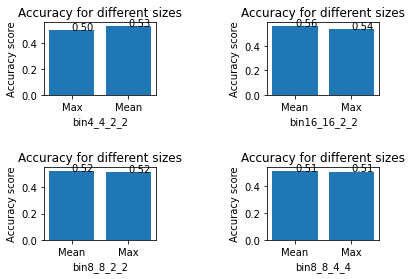

In [8]:
y = [item[1] for item in bin4_4_2_2]  # extract the second element from each tuple as x values
x = [item[2] for item in bin4_4_2_2]

y1 = [item[1] for item in bin16_16_2_2]  # extract the second element from each tuple as x values
x1 = [item[2] for item in bin16_16_2_2]

y2 = [item[1] for item in bin8_8_2_2]  # extract the second element from each tuple as x values
x2 = [item[2] for item in bin8_8_2_2]

y3 = [item[1] for item in bin8_8_4_4]  # extract the second element from each tuple as x values
x3 = [item[2] for item in bin8_8_4_4]
# create a figure with 4 subplots
fig, axs = plt.subplots(2, 2)


# plot the data on each subplot
axs[0, 0].bar(x, y)
axs[0, 0].set_title("Accuracy for different sizes")
axs[0, 0].set_xlabel("bin4_4_2_2")
axs[0, 0].set_ylabel("Accuracy score")

for i, j in zip(x[::1], y[::1]):
    axs[0, 0].text(i, j, '{:.2f}'.format(j))
    
axs[0, 1].bar(x1, y1)
axs[0, 1].set_title("Accuracy for different sizes")
axs[0, 1].set_xlabel("bin16_16_2_2")
axs[0, 1].set_ylabel("Accuracy score")
for i, j in zip(x1[::1], y1[::1]):
    axs[0, 1].text(i, j, '{:.2f}'.format(j))

axs[1, 0].bar(x2, y2)
axs[1, 0].set_title("Accuracy for different sizes")
axs[1, 0].set_xlabel("bin8_8_2_2")
axs[1, 0].set_ylabel("Accuracy score")
for i, j in zip(x2[::1], y2[::1]):
    axs[1, 0].text(i, j, '{:.2f}'.format(j))

axs[1, 1].bar(x3, y3)
axs[1, 1].set_title("Accuracy for different sizes")
axs[1, 1].set_xlabel("bin8_8_4_4")
axs[1, 1].set_ylabel("Accuracy score")
for i, j in zip(x3[::1], y3[::1]):
    axs[1, 1].text(i, j, '{:.2f}'.format(j))

# set the spacing between subplots
plt.subplots_adjust(hspace=1, wspace=1)

# display the plots
plt.show()